<a href="https://colab.research.google.com/github/jsalinas1501/upc_data-mining/blob/master/S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### Importar las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/aladelca/machine_learning_model/main/archivos_trabajo/titanic.csv'

data = pd.read_csv(url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Count'>

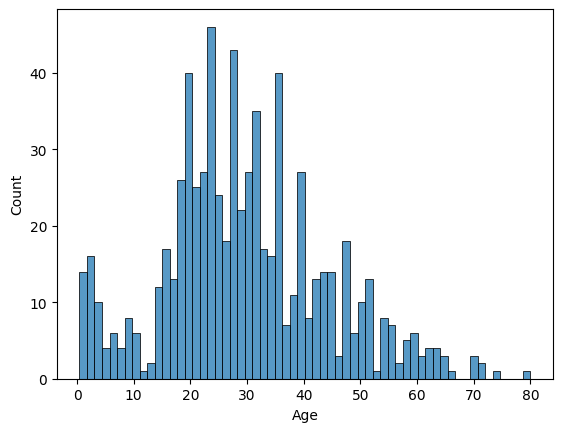

In [ ]:
#### Outliers
#### Distribución de las variables

sns.histplot(data = data, x = 'Age', bins = 60)

<Axes: xlabel='Age'>

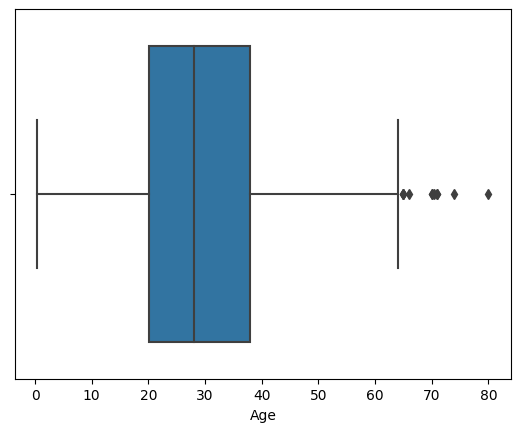

In [ ]:
sns.boxplot(data = data, x = 'Age')

In [ ]:
# Método de cajas y bastones

q1 = np.nanquantile(data['Age'],0.25)
q2 = np.nanmedian(data['Age'])
q3 = np.nanquantile(data['Age'],0.75)
print('Q1:', q1)
print('Q2:', q2)
print('Q3:', q3)

ric = q3 - q1
baston_superior =  q3 + 1.5*ric
baston_inferior = q1 - 1.5*ric
print(baston_inferior)
print(baston_superior)


Q1: 20.125
Q2: 28.0
Q3: 38.0
-6.6875
64.8125


In [ ]:
# Método de las 3 sigmas

sd_age = np.std(data['Age'])
media_age = np.mean(data['Age'])
limite_superior = media_age + 3*sd_age
limite_inferior = media_age - 3*sd_age
print(limite_superior)
print(limite_inferior)

73.24808109951076
-13.849845805393123


<Axes: xlabel='Fare'>

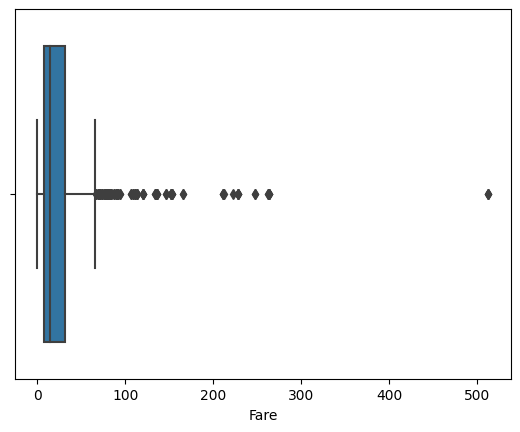

In [ ]:
### Variable: Fare
### Método de cajas y bastones

sns.boxplot(data = data, x = 'Fare')

In [ ]:
### Las grandes mentiras del promedio

salarios = np.array([1200,14000,2000,2300,1500,1600,1800])
print('Promedio:',np.mean(salarios))
print('Mediana:', np.median(salarios))

Promedio: 3485.714285714286
Mediana: 1800.0


In [ ]:
q1 = np.quantile(salarios,0.25)
q3 = np.quantile(salarios,0.75)
ric_salarios = q3 - q1
baston_superior = q3 + 1.5*ric_salarios
baston_inferior = q1 - 1.5*ric_salarios
print(baston_superior)
print(baston_inferior)


np.where((salarios>baston_superior) | (salarios<baston_inferior), 1, 0)

3050.0
650.0


array([0, 1, 0, 0, 0, 0, 0])

In [ ]:
#### Valores nulos
#### Edad

print(data['Age'].isna().sum())
print(data['Age'].isna().mean())

177
0.19865319865319866


In [ ]:
#### Imputación

##### Imputación por media o mediana no condicionadas

media = np.mean(data['Age'])
mediana = np.nanmedian(data['Age'])
print(media)
print(mediana)

29.69911764705882
28.0


<Axes: xlabel='Age', ylabel='Count'>

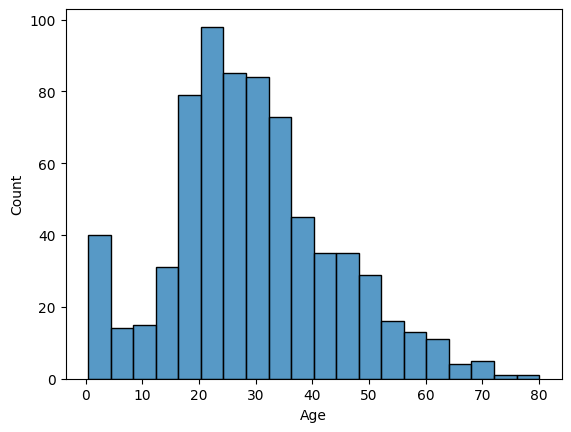

In [ ]:
### Distribución de la variables

sns.histplot(data = data, x = 'Age')

<Axes: xlabel='Age', ylabel='Count'>

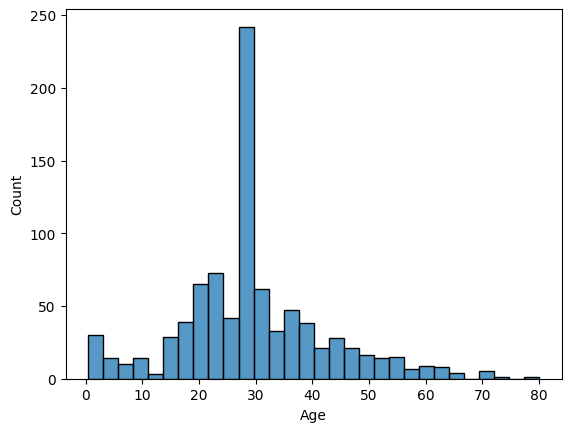

In [ ]:
#### Imputar por la mediana

sns.histplot(data['Age'].fillna(mediana))

<Axes: xlabel='Age', ylabel='Count'>

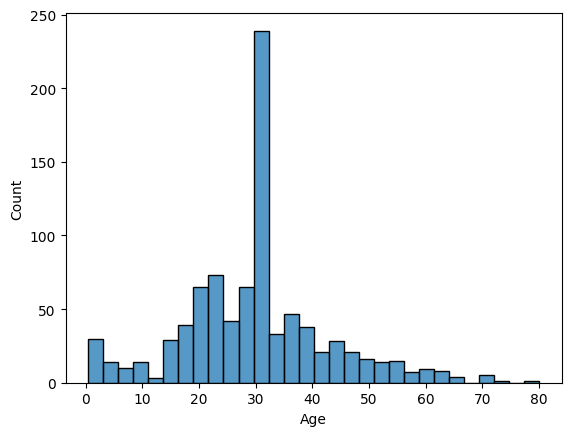

In [ ]:
sns.histplot(data['Age'].fillna(media))

<Axes: ylabel='Count'>

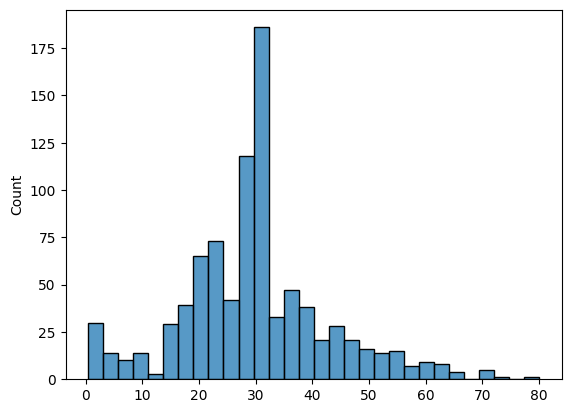

In [ ]:
### Imputación por medias o medianas condicionadas

medias_por_sexo = data.groupby(['Sex'])['Age'].mean().reset_index()
data_edad = data[['Sex','Age']].merge(medias_por_sexo, on = ['Sex'], how ='left', suffixes= ['','_imputado'])
sns.histplot(np.where(data_edad['Age'].isna(), data_edad['Age_imputado'], data_edad['Age']))

<Axes: ylabel='Count'>

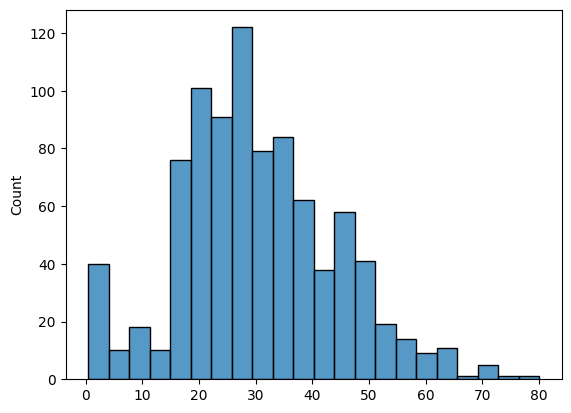

In [ ]:
### Imputación por algoritmos de machine learning


from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
sns.histplot(imputer.fit_transform(data[['Age','Fare']])[:,0])


<Axes: xlabel='Age', ylabel='Count'>

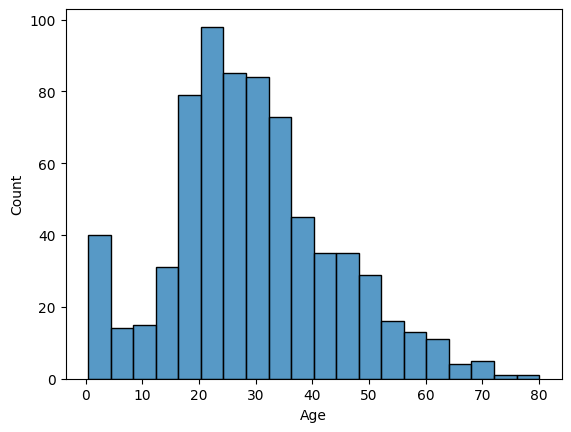

In [ ]:
sns.histplot(data['Age'])

In [ ]:

#### Traer datos de spotify

#!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = 'df49aff379ba4c0691320fec12f55955'
client_secret = 'a19bb480b5a1471eb5952d98994f7cd4'


client_credentials_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret)
sp = spotipy.Spotify(client_credentials_manager= client_credentials_manager)
playlist_id = '67YxY4S5KSI1zgUQnxGq4H'



In [ ]:
results = sp.playlist_tracks(playlist_id)

In [ ]:
list_track_id = []
list_disc_number = []
list_duration = []
list_explicit = []
list_name = []
list_danceability = []
list_energy = []
list_loudness = []
list_mode = []
list_speechiness = []
list_instrumentalness = []
list_liveness = []
list_tempo = []


for i in range(len(results['items'])):
  canciones = results['items'][i]['track']
  id = canciones['id']
  list_track_id.append(id)
  disc_number = canciones['disc_number']
  list_disc_number.append(disc_number)
  duration = canciones['duration_ms']
  list_duration.append(duration)
  explicit = canciones['explicit']
  list_explicit.append(explicit)
  name = canciones['name']
  list_name.append(name)

  audio_features = sp.audio_features(id)[0]
  danceability = audio_features['danceability']
  list_danceability.append(danceability)
  energy = audio_features['energy']
  list_energy.append(energy)
  loudness = audio_features['loudness']
  list_loudness.append(loudness)
  mode = audio_features['mode']
  list_mode.append(mode)
  speechiness = audio_features['speechiness']
  list_speechiness.append(speechiness)
  instrumentalness = audio_features['instrumentalness']
  list_instrumentalness.append(instrumentalness)
  liveness = audio_features['liveness']
  list_liveness.append(liveness)
  tempo = audio_features['tempo']
  list_tempo.append(tempo)

In [ ]:
data_dict = {'id':list_track_id,
             'name':list_name,
             'duration':list_duration,
             'explicit':list_explicit,
             'disc_number':list_disc_number,
             'danceability':list_danceability,
              'energy':list_energy,
              'loudness':list_loudness,
              'mode':list_mode,
              'speechiness':list_speechiness,
              'instrumentalness':list_instrumentalness,
              'liveness':list_liveness,
              'tempo':list_tempo}
df_final = pd.DataFrame(data_dict)

<Axes: >

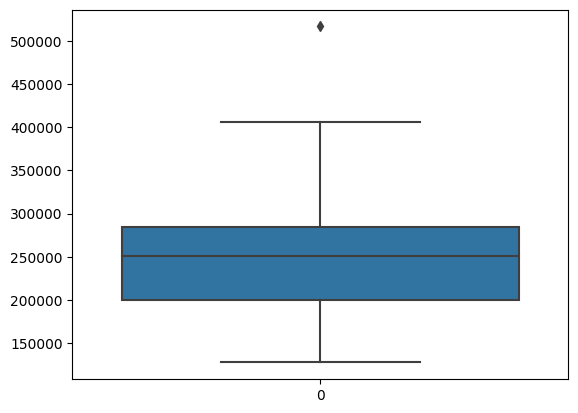

In [ ]:
sns.boxplot(df_final['duration'])

In [ ]:
q1 = np.quantile(df_final['duration'],0.25)
q3 = np.quantile(df_final['duration'],0.75)
ric = q3 - q1

baston_superior = q3 + 1.5*ric
baston_inferior = q1 - 1.5*ric
print(baston_superior)
print(baston_inferior)

410360.125
74109.125


In [ ]:
df_final[df_final['duration']>baston_superior]

,id,name,duration,explicit,disc_number,danceability,energy,loudness,mode,speechiness,instrumentalness,liveness,tempo
5,1fDsrQ23eTAVFElUMaf38X,American Pie,516893,False,1,0.531,0.481,-11.709,0,0.06,0.0,0.0842,138.45


In [ ]:
#### Twitter

import requests
import os
import json
import tweepy

import pandas as pd

api_key = '2aQYZcvWpaW5INByLcC1KHhuC'
api_secrets = 'AxE15y26rR4OczAkdETCmX6eBEwNOq2VHCqyzchfdIollXwEN5'
access_token = '792213915384025088-27Aoby4SsX5kUphZH6ji62s5YopBDxy'
access_secret = 'ihSglKiniRXzKxhkbj7KBcjmaWjt8h2AQ45cgUCLznoRJ'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAKqNcQEAAAAAL0UtFFzj0KdaYV%2BuScdKXzlmahw%3DoaplSvbRt4c2yrDBPC3qjagrAQwUzI2XDvVx1HS6M3oWLoxGrA'
auth = tweepy.OAuthHandler(api_key, api_secrets)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)
search_query = 'data science'
api.Response

AttributeError: ignored